<a href="https://colab.research.google.com/github/csbae/actionet/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.15.0


In [0]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

In [0]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [0]:
assert len(x) == len(y)
len(x)

12

In [0]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias')

In [0]:
x_true = tf.placeholder(dtype=tf.float32, name='x_true')
y_true = tf.placeholder(dtype=tf.float32, name='y_true')

In [0]:
y_pred = tf.add(tf.multiply(weight, x_true), bias)

In [0]:
cost = tf.reduce_mean(tf.square(y_pred - y_true))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
for epoch in range(num_epochs):
  _, c = sess.run([optimizer, cost],feed_dict={x_true: x, y_true: y})
  if(epoch+1) % step_display == 0:
    #print("Epoch: ", epoch+1, "cost: ", c, "weight: ", sess.run(weight), "bias: ", sess.run(bias))
    print("Epoch: {:04d}, Cost: {:06.04f}, Weight: {:02.5f}, Bias: {:02.5f}".format(epoch+1, c, sess.run(weight)[0], sess.run(bias)[0]))
    
print("Finished!!")

Epoch: 0050, Cost: 9014.8555, Weight: 1.37529, Bias: 0.44390
Epoch: 0100, Cost: 5320.3848, Weight: 1.80082, Bias: 0.87103
Epoch: 0150, Cost: 3051.8564, Weight: 2.15551, Bias: 1.22928
Epoch: 0200, Cost: 1772.9108, Weight: 2.43818, Bias: 1.51792
Epoch: 0250, Cost: 1117.2012, Weight: 2.65227, Bias: 1.74071
Epoch: 0300, Cost: 813.7048, Weight: 2.80565, Bias: 1.90563
Epoch: 0350, Cost: 687.4140, Weight: 2.90931, Bias: 2.02359
Epoch: 0400, Cost: 640.2327, Weight: 2.97534, Bias: 2.10639
Epoch: 0450, Cost: 624.3879, Weight: 3.01495, Bias: 2.16494
Epoch: 0500, Cost: 619.5768, Weight: 3.03732, Bias: 2.20811
Epoch: 0550, Cost: 618.2241, Weight: 3.04916, Bias: 2.24239
Epoch: 0600, Cost: 617.8372, Weight: 3.05498, Bias: 2.27210
Epoch: 0650, Cost: 617.6891, Weight: 3.05757, Bias: 2.29991
Epoch: 0700, Cost: 617.5919, Weight: 3.05851, Bias: 2.32734
Epoch: 0750, Cost: 617.5023, Weight: 3.05867, Bias: 2.35520
Epoch: 0800, Cost: 617.4112, Weight: 3.05846, Bias: 2.38387
Epoch: 0850, Cost: 617.3170, Weight

In [0]:
training_cost = sess.run(cost, feed_dict={x_true: x, y_true: y})
print("Final cost: ", c)
print("Final weight: ", sess.run(weight))
print("Final bias: ", sess.run(bias))

Final cost:  617.0192
Final weight:  [3.056694]
Final bias:  [2.5088944]


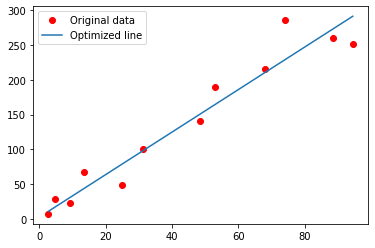

In [0]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label='Optimized line')
plt.legend()
plt.show()

In [0]:
sess.close()